In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.constants import sigma_sb
from astropy.constants import L_sun
from astropy.constants import c

In [2]:
#Load B and V filter transmission curves
%cd C:\Users\titan\OneDrive\Desktop\McMaster\Intro Astro\A1
B_data = np.loadtxt("Generic_Bessell.B.dat", delimiter=" ", skiprows=0)  # skip header row if needed
V_data = np.loadtxt("Generic_Bessell.V.dat", delimiter=" ", skiprows=0)

wavelength_B = B_data[:,0] * u.AA
trans_B = B_data[:,1]

wavelength_V = V_data[:,0] * u.AA
trans_V = V_data[:,1]

C:\Users\titan\OneDrive\Desktop\McMaster\Intro Astro\A1


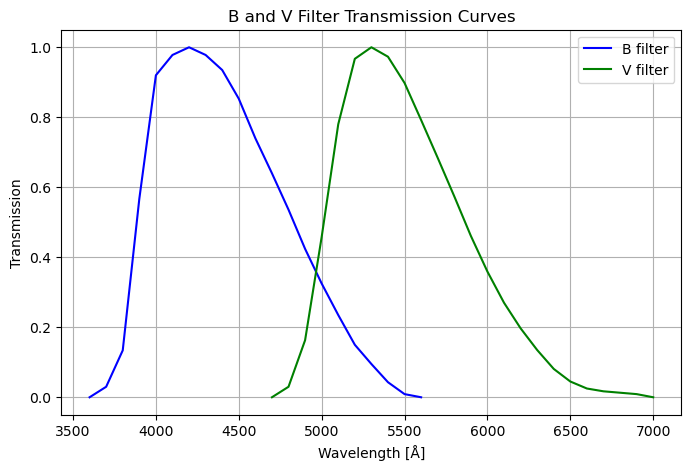

In [3]:
# Plot transmission curves
plt.figure(figsize=(8,5))
plt.plot(wavelength_B, trans_B, label='B filter', color='blue')
plt.plot(wavelength_V, trans_V, label='V filter', color='green')
plt.xlabel("Wavelength [Å]")
plt.ylabel("Transmission")
plt.title("B and V Filter Transmission Curves")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#Stellar temperatures
temperatures = np.array([4000,15000,30000,]) * u.K  # Example temperatures
T_sun = 5770 * u.K

In [5]:
bb = BlackBody(temperatures[1])
flux_across_B = np.array(bb(wavelength_B)) * bb(wavelength_B).unit
flux_across_V = np.array(bb(wavelength_V)) * bb(wavelength_V).unit

In [6]:
#compute combination of filter and flux
result_flux_B = flux_across_B * trans_B
result_flux_V = flux_across_V * trans_V

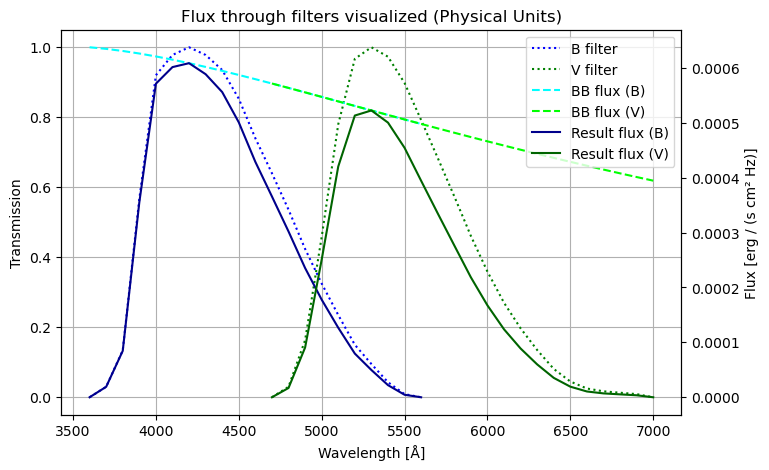

In [7]:
# Create figure and left axis for transmission
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(wavelength_B, trans_B,':', label='B filter', color='blue')
ax1.plot(wavelength_V, trans_V, ':', label='V filter', color='green')
ax1.set_xlabel("Wavelength [Å]")
ax1.set_ylabel("Transmission")
ax1.grid(True)

# Right axis for flux (physical units)
ax2 = ax1.twinx()
ax2.plot(wavelength_B, flux_across_B, '--', label='BB flux (B)', color='cyan')
ax2.plot(wavelength_V, flux_across_V, '--', label='BB flux (V)', color='lime')
ax2.plot(wavelength_B, result_flux_B, label='Result flux (B)', color='darkblue')
ax2.plot(wavelength_V, result_flux_V, label='Result flux (V)', color='darkgreen')
ax2.set_ylabel("Flux [erg / (s cm² Hz)]")  # Actual flux units

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title("Flux through filters visualized (Physical Units)")
plt.show()

In [8]:
def integrated_colour_flux(temperature,wavelengths,transmission):
    bb = BlackBody(temperature)
    frequencies = (c / wavelengths).to(u.Hz)
    flux_across_band = np.array(bb(frequencies)) * bb(frequencies).unit
    result_flux = flux_across_band * transmission
    integrated_flux = np.trapezoid(result_flux,frequencies)
    #integrating over frequcnies backwards so account for nagative
    integrated_flux = -integrated_flux
    return integrated_flux

In [9]:
F_B_sun = integrated_colour_flux(T_sun,wavelength_B,trans_B)
F_V_sun = integrated_colour_flux(T_sun,wavelength_V,trans_V)
print(F_B_sun)
print(F_V_sun)

2365424520.1792197 erg / (s sr cm2)
2275882709.1722684 erg / (s sr cm2)


In [10]:
B = []
V = []
for T in temperatures:
    B_var = integrated_colour_flux(T,wavelength_B,trans_B)
    V_var = int_colour_flux_V = integrated_colour_flux(T,wavelength_V,trans_V)
    B.append(B_var.value)
    V.append(V_var)
B = B * B_var.unit
V = V * V_var.unit

In [11]:
print(B)
print(V)

[1.96046970e+08 8.97191997e+10 3.63141233e+11] erg / (s sr cm2)
[3.03184788e+08 4.54349175e+10 1.55546999e+11] erg / (s sr cm2)


In [12]:
B_minus_V = -2.5*np.log10(B/V) + 2.5*np.log10(F_B_sun/F_V_sun) + 0.65

In [13]:
#Load model from CSV for comparison
model_data = np.loadtxt("Q3_model_curves.csv", delimiter=",", skiprows=1)  # columns: Teff, BV
T_model = model_data[:,0]
BV_model = model_data[:,1]
BC_model = model_data[:,2]

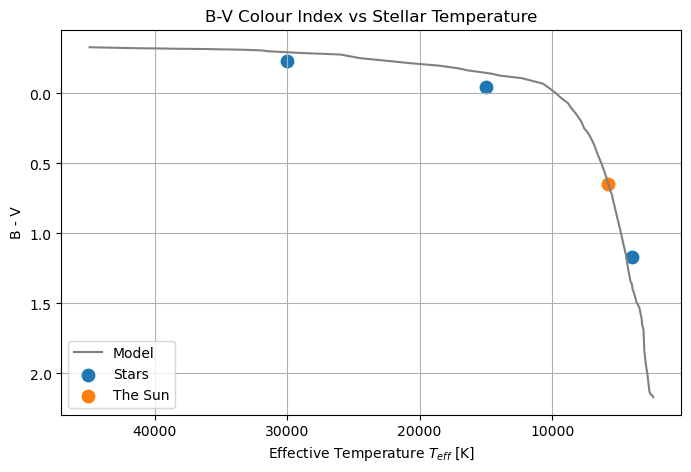

In [14]:
#Plot results
plt.figure(figsize=(8,5))
plt.plot(T_model, BV_model, label='Model', color='grey')
plt.scatter(temperatures.value, B_minus_V, s=80, label='Stars')
plt.scatter(T_sun, 0.65, s=80, label='The Sun')
plt.xlabel('Effective Temperature $T_{eff}$ [K]')
plt.ylabel('B - V')
plt.title('B-V Colour Index vs Stellar Temperature')
plt.gca().invert_xaxis()  #hot stars on left, cool on right
plt.gca().invert_yaxis()  #Bluer stars on top
plt.legend()
plt.grid(True)
plt.show()